In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

# 1 Data Exploration

### 1.1 Kernel Density Estimation
- Application: Kernel Density Estimation (KDE) is used to find the true distribution of the data and can be used to generate new data points once those parameters are found.
- Description: KDE is a non-parametric way of estimation to get probability density function to understand the distribution of the underlying data.
- Functionality:
    * We start by selecting a kernel function (i.e. Gaussian, triangle) and generate such function for each data point. We usually apply Gaussian.
    * To get a true representation of our data, we then aggregate those functions acorss data points
    * The resulting kernel density estimate is hence the aggregation of all individual kernel functions
    * The first parameter to specify is the bandwith, determining the width of a kernel function and hence the smoothness of the resulting curve. The higher the bandwidth, the smoother the fitted distribution line.
    * The second parameter to specify is the distribution of the kernel function. The bandwidth also effects the individual kernel functions. The lower the bandwidth, the higher the kernel function.
    * The bandwidth can be calculated as: $1.06 * min(\sigma, \frac{IQR}{1.34}) * n^ {\!-1/5}$
    * Alternatively, we can plot the KDE with different parameters and observe and finetune the results
- Limitations: Histogramms might make the job if I'm just interested in the distribution of the data

In [98]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KernelDensity

Here is one new datapoints: [[5.46939116]]


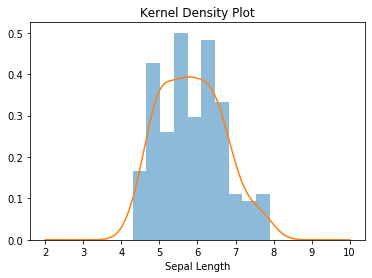

In [99]:
# load data
iris = load_iris()
iris = pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
x = iris['SepalLengthCm'][:, np.newaxis]

# determine bandwidth and support
bw = 1.06 * x.std() * len(x) ** (-1/5)
support = np.linspace(2, 10, len(x))

# initialize KDE
kde = KernelDensity(kernel = 'gaussian', bandwidth = bw)

# fit kde
kde.fit(x)

# create new data
new_data = kde.sample(1, random_state=3)
print('Here is one new datapoints:', new_data)

# find support values (log density model on the data)
y = kde.score_samples(support[:, np.newaxis])

# plot the result
plt.hist(x, bins=10, alpha = 0.5, density = True)
plt.plot(support, np.exp(y))
plt.xlabel('Sepal Length')
plt.title('Kernel Density Plot')
plt.show()

### 1.2 Kolmogorov-Smirnov Test
- Application: The Kolmogorov-Smirnov Test (KS-Test) is applied to analyze the distribution of datasets. 
- Description: The KS-Test compares a sample with a reference probability distribution (one-sample K–S test), or compares two samples (two-sample K–S test). It hence provides insight into the godness of fit of samples.
- Functionality:
    * The test quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples
    * The null hypothesis is that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case)
- Limitations: The test only applies to continuous distributions

In [100]:
from scipy import stats

In [108]:
# create random normal distribution
x = np.random.normal(0, 1, 100)

# apply ks-test
stats.kstest(x, 'norm')

KstestResult(statistic=0.05976890513584643, pvalue=0.8673278748019739)

The first value is the ks-test statistic. The second value is the p-value. Since the p-value > 0.05, we do not reject the null hypothesis and can conclude that the distribution is indeed normally distributed.

# 2 Feature Engineering

## 2.1 Standardization

### 2.1.1 StandardScalar()
- Application: StandardScalar is applied to data columns and hence only one feature.
- Description: StandardScalar standardizes features individually by removing the mean and scaling to unit variance ($ z = \frac{x - u}{s} $). Unit variance means that the standard deviation of a sample as well as the variance will tend towards 1 as the sample size tends towards infinity.

In [23]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [24]:
# load data
iris = load_iris()
iris = pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
print(iris.describe())

# initiate StandardScaler()
scaler = StandardScaler()

# fit scaler and transform iris data
iris_standard_scaler = scaler.fit_transform(iris)

# print standardized data
print(pd.DataFrame(iris_standard_scaler, columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]).describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.057333       3.758000      1.199333
std         0.828066      0.435866       1.765298      0.762238
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   1.500000e+02  1.500000e+02   1.500000e+02  1.500000e+02
mean   -1.690315e-15 -1.842970e-15  -1.698641e-15 -1.409243e-15
std     1.003350e+00  1.003350e+00   1.003350e+00  1.003350e+00
min    -1.870024e+00 -2.433947e+00  -1.567576e+00 -1.447076e+00
25%    -9.006812e-01 -5.923730e-01  -1.226552e+00 -1.183812e+00
50%    -5.250608e-02 -1.319795e-01   3.3

### 2.1.2 Normalizer()
- Application: Normalizer is applied to data rows and hence across features.
- Description: Normalizer rescales each row, meaning that it adjusts the value of each feature relative to the value of the other features in each row to a realative scale.

In [25]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import Normalizer

In [26]:
# load data
iris = load_iris()
iris = pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
print(iris.head())

# initiate StandardScaler()
scaler = Normalizer()

# fit scaler and transform iris data
iris_normlized = scaler.fit_transform(iris)

# print standardized data
print(pd.DataFrame(iris_normlized,  columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]).head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       0.803773      0.551609       0.220644      0.031521
1       0.828133      0.507020       0.236609      0.033801
2       0.805333      0.548312       0.222752      0.034269
3       0.800030      0.539151       0.260879      0.034784
4       0.790965      0.569495       0.221470      0.031639


## 2.2 Variance

### 2.2.1 VarianceThreshold()
- Application: VarianceThreshold() is applied for feature selection and identifies low variance features that won't be significant in predicting the target variable.
- Description: VarianceThreshold() is a feature selector that removes all low-variance features.

In [27]:
from sklearn.feature_selection import VarianceThreshold

In [28]:
# create data frame
x = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
df = pd.DataFrame(x, columns = ["a", "b", "c", "d"])

# initialize VarianceThreshold
selector = VarianceThreshold()

# fit model and transform data frame
df_new = selector.fit_transform(df)

# print results
print("These are the infos on the original data frame:", "\n", df.describe())
print("This is how the transformed data frame looks like:", "\n", 
      pd.DataFrame(df_new, columns = df.columns[selector.get_support()]))

These are the infos on the original data frame: 
          a         b         c    d
count  3.0  3.000000  3.000000  3.0
mean   0.0  1.333333  1.666667  3.0
std    0.0  0.577350  2.081666  0.0
min    0.0  1.000000  0.000000  3.0
25%    0.0  1.000000  0.500000  3.0
50%    0.0  1.000000  1.000000  3.0
75%    0.0  1.500000  2.500000  3.0
max    0.0  2.000000  4.000000  3.0
This is how the transformed data frame looks like: 
    b  c
0  2  0
1  1  4
2  1  1


## 2.3 Correlation

### 2.3.1 Correlation Matrix
- Application: Correlation matrix is applied for feature selection and identifies highly correlated features that should be removed.
- Description: Find the correlation matrix and remove features that are highly correlated.

In [ ]:
from sklearn.datasets import load_iris

In [22]:
# load data
iris = load_iris()
iris = pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])

# run correlation matrix
iris.corr(method = "pearson")[(iris.corr(method = "pearson") > 0.9) & (iris.corr(method = "pearson") != 1)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,NaN,NaN,NaN,NaN
SepalWidthCm,NaN,NaN,NaN,NaN
PetalLengthCm,NaN,NaN,NaN,0.962865
PetalWidthCm,NaN,NaN,0.962865,NaN


## 2.4 Text

### 2.4.1 TfidfVectorizer()
- Application: TfidfVectorizer is applied to convert text (documents) into numerical values, namely a matrix of tf-idf features.
- Description: 
    * Tf–idf is short for term frequency–inverse document frequency and represents a numerical statistic that is intended to reflect how important a word is to a document.
    * The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, helping to adjust for the fact that some words appear more frequently in general.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# create list of text documents
corpus = ["cats greet cats", "dogs say woof to dogs", "dogs chase cats"]

# initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# fit vectorizer
vectorizer.fit(corpus)

# transform the document
corpus_vectorized = vectorizer.transform(corpus)

# print results
print("The unique words in the corpus are:", "\n", vectorizer.get_feature_names())
print("The resulting matrix looks like this:", "\n", corpus_vectorized.toarray())

The unique words in the corpus are: 
 ['cats', 'chase', 'dogs', 'greet', 'say', 'to', 'woof']
The resulting matrix looks like this: 
 [[0.83559154 0.         0.         0.54935123 0.         0.
  0.        ]
 [0.         0.         0.65985664 0.         0.43381609 0.43381609
  0.43381609]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.
  0.        ]]


### 2.4.2 CountVectorizer()
- Application: CountVectorizer is applied to count the number of times a word appears in a document. 
- Description:
    * Returns a vector with a length of the entire vocabulary of the document and an integer count for the number of times each word (token) appeared in the document.
    * The output is presented as a sparse matrix.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
# create list of text documents
corpus = ["cats greet cats", "dogs say woof to dogs", "dogs chase cats"]

# initialize the CountVectorizer
vectorizer = CountVectorizer()

# fit the vectorizer
vectorizer.fit(corpus)

# transform the document
corpus_vectorized = vectorizer.transform(corpus)

# print results
print("The unique words in the corpus are:", "\n", vectorizer.vocabulary_)
print("The resulting matrix looks like this:", "\n", corpus_vectorized.toarray())

The unique words in the corpus are: 
 {'cats': 0, 'greet': 3, 'dogs': 2, 'say': 4, 'woof': 6, 'to': 5, 'chase': 1}
The resulting matrix looks like this: 
 [[2 0 0 1 0 0 0]
 [0 0 2 0 1 1 1]
 [1 1 1 0 0 0 0]]


### 2.4.3 Keyword Extraction
- Application: Keyword extraction is used for text mining, information retrieval, and natrual language processing
- Description:
    * Keyword extraction automatically identifies terms that best describe the subject of a document
    * It determines key phrases in a body of text by analyzing the frequency of word appearance and its co-occurance with other words in the text

In [64]:
from rake_nltk import Rake

In [88]:
# load data
movies = pd.read_csv('00_Data/Movies.csv', index_col = 0)
movies_plot = movies.loc[:, ['Title', 'Plot']]

# extracting keywords from plots
movies_plot['Keywords'] = ''
for index, row in movies_plot.iterrows():
    plot = row['Plot']
    # instantiating Rake, by default it uses english stopwords from nltk and discards puntuation
    r = Rake()
    # extracting the words by passing the text
    r.extract_keywords_from_text(plot)
    # getting the dictionary whith key words as keys and their scores as values
    keywords_dict_scores = r.get_word_degrees()
    # assigning the key words to the new column for the corresponding movie
    row['Keywords'] = list(keywords_dict_scores.keys())

# print one example
print('The keywords from the plot of the movie The Dark Knight are:', list(movies_plot[movies_plot['Title'] == 'The Dark Knight']['Keywords']))

The keywords from the plot of the movie The Dark Knight are: [['mysterious', 'past', 'people', 'menace', 'known', 'chaos', 'gotham', 'ability', 'wreaks', 'havoc', 'dark', 'knight', 'must', 'accept', 'one', 'physical', 'tests', 'joker', 'emerges', 'greatest', 'psychological', 'fight', 'injustice']]


### 2.4.4 Word Embeddings
- Application: Word embeddings are used to capture context of a word in a document and are hence applied for sentiment analysis
- Description:
    * Word embeddings are word representations (words are mapped to vectors of real numbers) that allow words with similar meaning to have a similar representation
    * There are several algorithms to perform this task, for example Word2Vec, which again consists of two learning models:
        * Continuous Bag-of-Words (CBOW): Learns the embedding by predicting the current word based on its context
        * Continuous Skip-Gram-Model: Learns by predicting the surrounding words given a current word
    * Pre-trained embeddings allow one to identify words in a document that are related to a given input word

In [142]:
# import gensim

# initialize model
#model_gn = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# define keys to create embeddings for
#keys = ['love', 'hate', 'stocks']

# create embeddings
#embedding_clusters = []
#word_clusters = []
#for word in keys:
#    embeddings = []
#    words = []
#    for similar_word, _ in model_gn.most_similar(word, topn=30):
#        words.append(similar_word)
#        embeddings.append(model_gn[similar_word])
#    embedding_clusters.append(embeddings)
#    word_clusters.append(words)

## 2.5 Oversampling

### 2.5.1 Synthetic Minority Oversampling Technique
- Application: Synthetic Minority Oversampling Technique (SMOTE) is used to adjust the distribution of classes in a dataset if we have imbalanced data that needs to be classified.
- Description:
    * We differentiate between undersampling, where we have to reduce the number of majority cases, and oversampling, where we have to increase the number of minority cases
    * SMOTE is applied to oversample the minority class
    * We randomly select a minority point, find the k-nearest neighbors for the point (typically $k=5$) and add synthetic points between the chosen point and one randomly selected neighbor

In [12]:
from imblearn.over_sampling import SMOTE

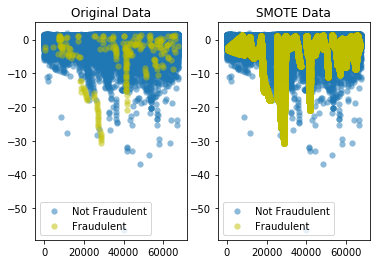

In [11]:
# load data
credit = pd.read_csv('00_Data/Credit.csv',index_col=0)
y = credit.iloc[:,-1].values
x = credit.iloc[:, :-1].values

# initialize method
method = SMOTE()

# create resampled feature set
x_resampled, y_resampled = method.fit_sample(x, y)

# plot cases along first two features
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(x[y == 0, 0], x[y == 0, 1], label="Not Fraudulent", alpha=0.5, linewidth=0.15)
ax1.scatter(x[y == 1, 0], x[y == 1, 1], label="Fraudulent", alpha=0.5, linewidth=0.15, c='y')
ax1.legend()
ax1.set_title('Original Data')
ax2.scatter(x_resampled[y_resampled == 0, 0], x_resampled[y_resampled == 0, 1], label="Not Fraudulent", alpha=0.5, linewidth=0.15)
ax2.scatter(x_resampled[y_resampled == 1, 0], x_resampled[y_resampled == 1, 1], label="Fraudulent", alpha=0.5, linewidth=0.15, c='y')
ax2.legend()
ax2.set_title('SMOTE Data')
plt.show()

## 2.6 Dimension Reduction

### 2.6.1 Principle Component Analysis
- Application: PCA is applied to reduce the dimensionality of data and to find patterns in data of high dimension
- Desciption: PCA represents the original data in a smaller number of components. The number of components should be reduced as much as possible, while still describing >85% of the data's variance
- Functionality:
    * Standardize the features, otherwise variables with relatively higher variance outweigh other features
    * We have a point cloud and want to find its major/minor direction
    * This point cloud is centered at $\mu$, but we want to re-center it at the origin (subtract the column means)
    * We then rotate the matrix to be more axis-aligned by multiplying it with an orthogonal matrix and make the columns orthonormal; mathematically, the columns of our matrix are now uncorrelated, meaning that the resulting components will also be uncorrelated
    * We then perform matrix singular value decomposition on the above described matrix into eigenvectors and eigenvalues (this can also be performed on the covariance matrix between columns)
    * The eigenvalues represent the variance described by the corresponding eigenvector
    * We now sort the eigenvalues in descending order in order to select as many eigenvector necessary to describe our original data well enough
    * The eigenvectors can be used to represent the loadings:
        * They can be thought of as the directions in the feature space along which the data vary the most
        * They can be used to determine the contribution of each feature to each of the component
        * The resulting vectors fit the data, minimizing the distance between each observation and the vector
    * The principal component scores are derived multiplying the loadings by the feature values
    * Biplot are used to displays the principle component scores as well as the principle component loadings
- Limitations: PCA assumes linear relationships between data points and is usually just a pre-processing step

In [123]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [176]:
# load data
iris = load_iris()
iris = pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])

# fit pca without specifying n_components
pca = PCA().fit(iris)

# find optimal number of components
print('The cummulative explained variance by each component is:', np.cumsum(pca.explained_variance_ratio_))

# fit pca with n_components = 1
pca = PCA(n_components = 1).fit(iris)

# reduce dimensionality of iris
iris_reduced = pca.fit_transform(iris)

# transform data back to its original shape
iris_inverse = pca.inverse_transform(iris_reduced)
print(pd.DataFrame({'pca_inverse': iris_inverse[0], 'original': iris.values[1]}))

# print new data
print('The shape of the iris_reduced is:', iris_reduced.shape)

The cummulative explained variance by each component is: [0.92461872 0.97768521 0.99478782 1.        ]
   pca_inverse  original
0     4.873326       4.9
1     3.284202       3.0
2     1.458588       1.4
3     0.237640       0.2
The shape of the iris_reduced is: (150, 1)


### 2.6.2 Truncated Singular Value Decomposition
- Application: Truncated Singular Value Decomposition (SVD) is applied for text mining. It reduces dimensions of text data and is a pre-preparation tool for the clustering of text data.
- Description: Contrary to PCA, Truncated SVD does not center the data before computing the singular value decomposition, meaning that it can work with sparse matrices efficiently
- Functionality:
    * We first have to transform text into features with numerical values: There are several techniques such as CountVectorizer or TfidfVectorizer
    * We then perform SVD on the numerical matrix like we do in PCA
    * Only the column and row vectors corresponding to the largest eigenvalues are calculated and the rest of the matrix is discarded
- Limitations: Text data needs to be vectorized before Truncated SVD can be applied to it. Truncated SVD is usually just a pre-processing setp

In [20]:
from scipy.sparse import random as sparse_random
from sklearn.decomposition import TruncatedSVD

In [33]:
# load random sparse matrix (i.e. representing tf-idf matrix)
x = sparse_random(100, 100, density = 0.1, random_state = 42)

# initialize and fit svd
svd = TruncatedSVD(n_components = 42).fit(x)

# find optimal number of components
print('The cummulative explained variance by each component is:', np.cumsum(svd.explained_variance_ratio_))

# transform data
x_svd = svd.fit_transform(x)

# print results
print(pd.DataFrame(x_svd[:1]))

The cummulative explained variance by each component is: [0.01342521 0.05961285 0.10155722 0.13995647 0.17480073 0.20896208
 0.24148441 0.27200877 0.30147327 0.33037641 0.35709628 0.38327579
 0.40810268 0.43237488 0.4558951  0.47848363 0.50058471 0.52205071
 0.54178362 0.56130295 0.57953759 0.59744854 0.61443092 0.63087268
 0.64704028 0.66271213 0.67809192 0.69276143 0.707133   0.72123466
 0.73478017 0.74729161 0.75945563 0.7715399  0.78292753 0.79406602
 0.80469552 0.81498795 0.82436963 0.83366938 0.84273691 0.85121777]
         0         1         2         3         4         5         6   \
0  0.934004  1.115706  0.300979  0.590796  0.551706  0.065915 -0.033311   

        7         8         9   ...        32        33        34        35  \
0 -0.70139  0.491412  0.203077  ... -0.010019 -0.135218  0.150626 -0.008025   

         36        37        38        39        40        41  
0 -0.234909  0.013812 -0.185425 -0.119091  0.135215 -0.133744  

[1 rows x 42 columns]


# 3 Unsupervised Learning
This section presents several unsupervised learning algorithms in the following way:
- Application: When should this algorithm be used?
- Description: What does this algorithm do (high-level)?
- Functionality: How does this algorithm work (drill-down)?
- Limitations: What does one have to keep in mind when using this algorithm?
- Example: How is this algorithm applied?

## 3.1 Clustering

### 3.1.1 t-SNE

- Application: t-SNE is used in the initial stage of data exploration (quick & dirty approach).
- Description: t-SNE visualizes multi-dimensional data in two dimensions and it clusters the data in this two dimensional space, while preserving the relative distance of the data points.
- Functionality:
    * Start with one data point and calculate its distance to all other data points
    * Plot a normal distribution on top of the one data point that is in the center of the distribution
    * Plot the distances to the other poitns under the normal distribution
    * The height of the data point to the curve is called the similarity score (the higher the distance, the lower the height of the bar)
    * Plot the similarity scores in one dimension: High scores atttract each other, low scores repel each other
    * As a result, data points with high similarity are close to each other
    * If a t-Distribution is used instead of a normal distribution,we can better differentiate points further away from the first points because of their fatter tails  
    * Perplexity: Illustrates a guess about the number of close neighbors each point has; sqrt(n data points); usually 5-50
    * Learning rate: Intensity of how data points repel/attrach each other based on their similarity scores; usually 10-1,000
- Limitations: t-SNE should be used for data exploration only and not as input for other methods or models. The reason is that it is heuristig, meaning that its output changes every time the algorithm is executed

In [46]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

In [47]:
# load data
iris = load_iris()
iris = pd.concat([pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]), pd.DataFrame(iris['target'], columns = ['Species'])],
                axis = 1)

# take a look at dataframe
print("This dataframe has {} rows and {} columns.".format(iris.shape[0], iris.shape[1]))
print(iris.head())

# create array
x = iris.iloc[:, 1:5].values

This dataframe has 150 rows and 5 columns.
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


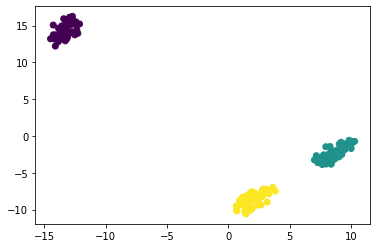

In [48]:
# initiate the model
tsne = TSNE(learning_rate = 100, perplexity = 40)

# fit the model and transform the data
x_tsne = tsne.fit_transform(x)

# plot the results
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=iris["Species"].astype('category').cat.codes)
plt.show()

### 3.1.2 K-Means
- Application: K-Means is applied to cluster data into a pre-determined number of homogeneous clusters.
- Description: K-Means minimizes the dispersion of data points within clusters by categorizing data point to the cluster with the nearest mean. Usually the euclidean distance is used to measure distances.
- Functionality:
    * Goal: Assign observation to $k$ clusters such that the total within-cluster variation, summed over the $k$ clusters is as small as possible
    * We start with $k$ initial clusters
    * We randomly place the $k$ centorids in the data (the better this initial guess is, the quicker will the algorithm find the true clusters)
    * Each observation is then assigned to the cluster with the closest centorid (usually we use Euclidean distance as distance measure)
    * We recompute the centroids of the clusters that lost or gained an observation from the above step
    * We stop this when moving any more obervations increases the cluster dispersion/when the distance between the new and old centroids is 0 (meaning that reasigning data points doesn't change the centroids)
    - **Silhouette coefficient**: Measure of how similar an object is to its own cluster compared to other clusters; it ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters; can be used to automate k-means clustering
- Limitations: We have to find and defind the ideal number of clusters; performance is limited for non-globular data structures; forces outliers into clusters

In [ ]:
from copy import deepcopy
from sklearn.cluster import KMeans

In [1]:
# load data
clara = pd.read_csv("00_Data/Xclara.csv")

# take a look at the data frame
print("This dataframe has {} rows and {} columns.".format(clara.shape[0], clara.shape[1]))
print(clara.head())

# create array
x = clara.loc[:, ["V1", "V2"]].values

This dataframe has 3000 rows and 2 columns.
          V1         V2
0   2.072345  -3.241693
1  17.936710  15.784810
2   1.083576   7.319176
3  11.120670  14.406780
4  23.711550   2.557729


#### Manual Calculation

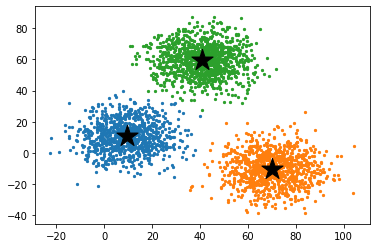

In [2]:
# define a function to calculate the euclidean distance
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# set a number of clusters
k = 3

# randomly generate k centroids
c_x = np.random.randint(0, np.max(x)-20, size=k)
c_y = np.random.randint(0, np.max(x)-20, size=k)
c = np.array(list(zip(c_x, c_y)), dtype=np.float32)

# initialize array to store updated centroids
c_old = np.zeros(c.shape)

# initialize labels for the clusters
clusters = np.zeros(len(x))

# initialize error (distance between old and new centroids)
error = dist(c, c_old, None)

# develop loop to calculate k-means clusters:
while error != 0:
    # assign each value to its closest cluster
    for i in range(len(x)):
        distances = dist(x[i], c)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # store the old centroid values
    c_old = deepcopy(c)
    # find the new centroids by taking the average value
    for i in range(k):
        points = [x[j] for j in range(len(x)) if clusters[j] == i]
        c[i] = np.mean(points, axis=0)
    error = dist(c, c_old, None)

# plot the clusters
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([x[j] for j in range(len(x)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=5)
plot = ax.scatter(c[:, 0], c[:, 1], marker='*', s=500, c='black')

#### Sklearn Package

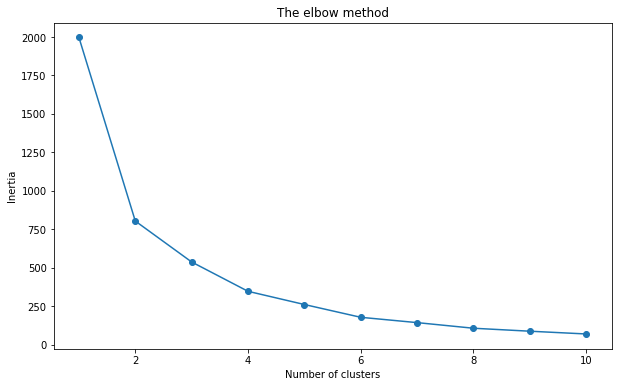

In [60]:
# find ideal number of clusters
def plot_inertia(array, start=1, end=10):
    
    # claculate interias
    inertia = []
    ks = range(start, end+1)
    
    for k in ks:
        model = KMeans(n_clusters = k, random_state = 0).fit(array)
        inertia.append(model.inertia_)
    
    # plot interias
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(ks, inertia, '-o')
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.show()
    
    # return plot
    return ax

inertia = plot_inertia(x)

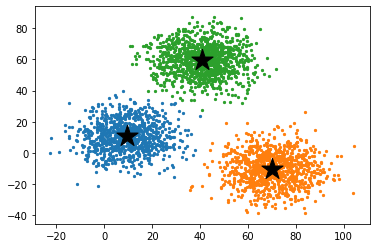

In [5]:
# set number of clusters
n_cluster = 3

# instantiate kmeans with 3 clusters
kmeans = KMeans(n_clusters = n_cluster)

# fit kmeans to the input data
kmeans = kmeans.fit(x)

# create cluster labels
labels = kmeans.predict(x)

# extract centroids
centroids = kmeans.cluster_centers_

# plot the clusters
fig, ax = plt.subplots()
for i in range(n_cluster):
    points = np.array([x[j] for j in range(len(x)) if labels[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s = 5)
plot = ax.scatter(centroids[:, 0], centroids[:, 1], marker = '*', s = 500, c = 'black')

### 3.1.3 DBSCAN
- Application: DBSCAN is used to find non-globular clusters based on a given radius, meaning that it can discover clusters of arbitrary shape.
- Description: DBCSAN is a density-based clustering algorithm that groups points that are close to each other and marks points as outliers if they lie alone in low-density regions (whose nearest neighbors are too far away).
- Functionality:
    * We pick a point at random that has not been assigned to a cluster or as an outlier
    * For this point, we compute its neighborhood to determine if it's a core point. If yes, we start a cluster with it. If no, we label t as an outlier
    * Once we find a core point, we expand the cluster by adding all directly reachable points and also perform neighborhood jumps to find all density-reachable points and add them to the cluster
    * We repeat these two steps until all points are assigned to a cluster of defined as an outlier 
    * Core points: Our clusters are built around our core points (hence the core part), so by adjusting our minPts parameter, we can fine-tune how dense our clusters cores must be.
    * Border Points: Also called density-reachable points. As an analogy, we can think of density-reachable points as being the “friends of a friend”. 
    * Outliers: Points that are neither core points nor are they close enough to a cluster to be density-reachable from a core point
    * We need to assign two parameters: Epsilon (radius) and minPts (min number of data points that we want to have in the neighborhood)
- Limitations: While DBSCAN is great at separating high density clusters from low density clusters, DBSCAN struggles with clusters of similar density. DBSCAN also stuggles with data of very high dimensions

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

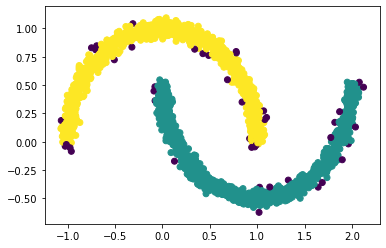

In [59]:
# load data
x, y = make_moons(n_samples = 2000, noise = 0.04)

# initialize model
dbscan = DBSCAN(eps = 0.05, min_samples = 10)

# fit model
dbscan.fit(x)

# get the labels
labels = dbscan.labels_

# plot results
plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()

### 3.1.4 Hierarchical Clustering
- Application: Hierarchical Clustering is used to get visual insights into clusters without any prior information and the need to specify the number of clusters a priori
- Description: Hierarchical Clustering build a hierarchy of clusters visualize them in dendrograms, revealing more information than non-hierarchical algorithms that returns a unique partition
- Functionality (agglomerative):
    * At the start, we treat each data point as its own cluster and calculate all pairwise dissimilarities using i.e. Euclidean distance
    * We identify the two clusters that are most similar and fuse them together, resulting in n-1 clusters
    * Now, we have to define new dissimilarities between groups of observations, referred to as linkage
    * There are different types of linkage: complete (compute all pairwise dissimilarities between cluster A and B and record the largest), single (compute all pairwise dissimilarities between cluster A and B and record the smallest), average (compute all pairwise dissimilarities between cluster A and B and record the average), ward (minimizing information loss)
    * We then examine the dissimilarites among the reulting clusters to identify the clusters that again are most similar to fuse them togehter, restulting in n-2 clusters
    * We repeat the above steps until one single cluster is formed
    * Once one overall cluster is formed, we develop dendrograms to divide the overall cluster into its sub-clusters
    * The height of the dendrograms represent the distances between the data points; the earlier the clusters form the more sumilar the data points; their proximity on the horizontal axis is irrelevant 
    * Dendrograms are used to obtain any number of clusters depending on the desired height   
- Limitations: Hierarchical Clustering has high time-complexity and can be difficult to read for large datasets; the choice of dissimilarity measure has a strong impact on the dendrograms

In [33]:
from sklearn.preprocessing import Normalizer
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [34]:
# load data
movements = pd.read_csv("00_Data/Movements.csv")

# take a look at dataframe
print("This dataframe has {} rows and {} columns.".format(movements.shape[0], movements.shape[1]))
print(movements.head(1))

# prepare data
x = movements.iloc[:,1:].values
companies = [i for sublist in movements.iloc[:,:1].values for i in sublist]

# normalize data
scaler = Normalizer()
x = scaler.fit_transform(x)

This dataframe has 60 rows and 964 columns.
  Unnamed: 0  2010-01-04  2010-01-05  2010-01-06  2010-01-07  2010-01-08  \
0      Apple        0.58   -0.220005   -3.409998       -1.17    1.680011   

   2010-01-11  2010-01-12  2010-01-13  2010-01-14  ...  2013-10-16  \
0   -2.689994   -1.469994    2.779997   -0.680003  ...    0.320008   

   2013-10-17  2013-10-18  2013-10-21  2013-10-22  2013-10-23  2013-10-24  \
0    4.519997    2.899987    9.590019   -6.540016    5.959976    6.910011   

   2013-10-25  2013-10-28  2013-10-29  
0   -5.359962    0.840019  -19.589981  

[1 rows x 964 columns]


#### Scipy Package

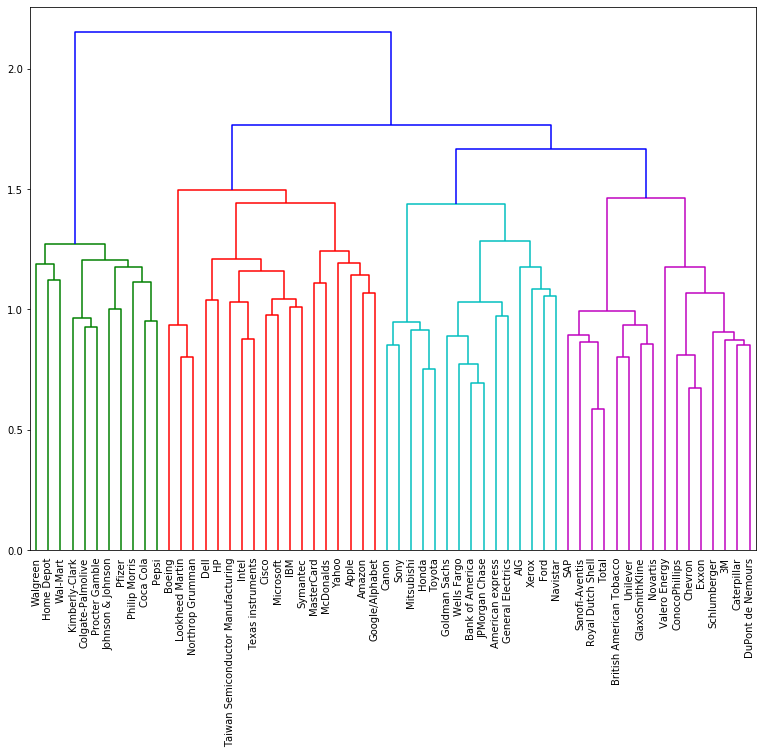

In [3]:
# calculate the linkage: mergings
mergings = linkage(x, method='ward')

# plot the dendrogram
plt.figure(figsize=(13,10))
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=10)
plt.show()

#### Sklearn Package

In [7]:
# initialize
agglom = AgglomerativeClustering(n_clusters = 4)

# fit the model
agglom.fit(x)

# extract labels
labels = agglom.labels_

# create data frame
df = pd.DataFrame({"comapny": companies, "labels": labels})

# print sorted data frame
df.sort_values("labels").head(18)

,comapny,labels
0,Apple,0
51,Texas instruments,0
50,Taiwan Semiconductor Manufacturing,0
47,Symantec,0
36,Northrop Grumman,0
33,Microsoft,0
31,McDonalds,0
30,MasterCard,0
24,Intel,0
23,IBM,0


## 3.2 Recommendation Engines

### 3.2.1 Cosine Similarity
- Application: Cosine Similarity is used for content-based recommendations and collaborative filtering
- Description: Cosine Similarity is a measure of similarity between two vectors projected in a multi-dimensional space, measuring the cosine of the angle between the two vectors
- Functionality:
    * Formula: $cosine$ $similarity$ $= cos(\theta) = \frac{A * B}{||A||||B||} = \frac{\sum_{i=1}^{N}A_iB_i}{\sqrt{\sum_{i=1}^{N}A_i^2} \sqrt{\sum_{i=1}^{N}B_i^2}}$
    * Content-based recommendation: Recommends items that are similar in content to items the user has liked in the past. When creating the cosine similarity matrix, the features of each item represent the vectors between which the cosine of the angles is measured. The result is a item-item matrix with respective cosine similarity scores
    * Collaborative filtering: Target user is recommended items based on past ratings of all users collectively. In this case, we create a user-item matrix, containing the users' ratings of each item in the cells. When creating the cosine similarity matrix, the ratings of each item represent the vectors between which the cosine of the angles is measured. The reult is a user-user matrix with respective cosine similarity scores. We then recommend items that the most similar users rated high and the target user hasn't consumed yet
- Limitations: Cold start problem, referring to a situation in which we don't have any information on the user(s) yet

In [153]:
from sklearn.metrics.pairwise import cosine_similarity

#### Content-based Recommendation

In [205]:
# load data
music = pd.read_csv('00_Data/Music.csv', index_col = 'name')
indices = pd.Series(music.index)
feature_mtrx = music.iloc[:, 2:].values

# calculate cosine similarity matrix
cosine_sim = cosine_similarity(feature_mtrx, feature_mtrx)

# create simple recommendation engine
def reco_engine(song, cosine_sim):
    recommended_songs = []
    idx = indices[indices == song].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    for i in top_10_indices:
        recommended_songs.append(list(music.index)[i])
    return recommended_songs

# run reco_engine
reco_engine('Half Your Age', cosine_sim)    

['When the Night is Over',
 'Beautiful',
 'Nasty Girl (feat. Diddy, Nelly, Jagged Edge & Avery Storm) - 2005 Remaster',
 'GANG GANG',
 'Hide Away',
 'Drinking Class',
 'Fix You',
 "She's Kinda Hot",
 'Insomnia',
 'The Next Best American Record']

## 3.3 Neural Networks

### 3.3.1 Autoencoder
- Application: An autoencoder is used for dimension reduction, image processing, and anomaly detection
- Description: An autoencoder is a neural network that learns to copy input to output by training a network that ignores noise
- Functionality:
    * An autoencoder has a hidden layer that describes a code used to represent the input and comprises two parts: Encoder mapping the input into the code, decoder mapping the code to a reconstruction of the original input
    * Copying the input perfectly would just duplicate it, therefore autoencoders usually are restricted in ways that force them to reconstruct the input approximately, preserving only the most relevant aspects of the data
    * Anomaly detection use case:
        * We can either train the model on normal instances only, or on a dataset with low frequency of anomalies (since their contribution to the representation learnt by the model can be neglected)
        * The model is encouraged to learn how to reproduce the most requent characteristics of observations
        * When faced with anomalies, the reproduction performance of the model decreases
        * After training, the model will be able to reconstruct normal data very well, while failing to do so with anomaly data
        * In order to detect anomalies, we calculate the reconstruction error (anomaly scores) of a data point, representing the error between the original data point and its reconstruction by the model
- Limitations: An autoencode is not able to identify which information is relevant because it learns to capture as much information as possible rather than as much relevant information as possible

In [213]:
from pyod.utils.data import generate_data
from pyod.models.auto_encoder import AutoEncoder

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_37 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_38 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 25)                275       
_________________________________________________________________
dropout_39 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 2)                

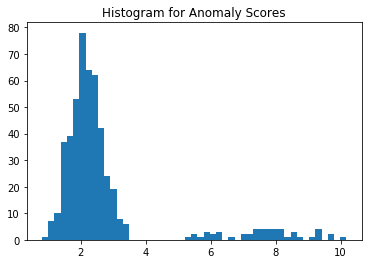

In [228]:
# create data
noise = 0.1
n_train = 500
n_test = 500
n_features = 10
X_train, y_train, X_test, y_test = generate_data(n_train = n_train, n_test = n_test, n_features = n_features, contamination= noise)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# initialize autoencoder (input and output layer has 25 neurons each, there are two hidden layers with each two neurons)
ae = AutoEncoder(hidden_neurons = [25, 2, 2, 25])

# fit autoencoder
ae.fit(X_train)

# find outliers in train data
anomaly_Scores_train = ae.decision_scores_

# apply trained model to predict anomaly score for each observation in test data (high socres relate to low frequence, hence outliers)
anomaly_scores_test = ae.decision_function(X_test)
anomaly_scores_test = pd.Series(anomaly_scores_test)

# plot the result
plt.hist(anomaly_scores_test, bins = 'auto')
plt.title("Histogram for Anomaly Scores")
plt.show()

## 3.4 Copulas
- Application: Copulas are used to investigate the dependence between variables and can also be used for quantile regressions to i.e. detect anomalies
- Description: Copulas are joint distribution functions of uniformly distributed random variables
- Functionality:
    * Looking at a x/y-plot is not advisable to evaluate whether two variables are dependent
    * Further, to evaluate the dependance of two variables, we should not evaluate their moments (like the Pearson correlation coefficient $\rho(x,y) = \frac{cov(x,y)}{\sqrt{v(x)v(y)}}$), but rather evaluate their bivariate distribution
    * However, the bivariate distribution contains information about both dependence and about marginal distribution, which we have to separate using copulas
    * Now, let $X$ ~ $F_X$, $Y$ ~ $F_Y$ and {$X, Y$} ~ $F_{X, Y}$, where $X$ and $Y$ are random variables and $F$ is the cummulative distribution (CDF)
        * We start by removing the influence of marginal distributions from the joint distribtuion, plugging in the random variable itself into the CDF to get a uniform distribtion: $F_X(X)$~$Unif(0,1)$
        * Next, check the display of $F_{U_X, U_Y}(u_x, u_y)$
        * This display represents the copula and can have different shapes, i.e. Gaussian, Frank, Clayton, Gumbel
        * The advantage this approach is that we can now transform the uniform data back into any distribution by choosing the right inverse CDF
    * **Empirical copula**: Calculated by $\frac{rank(x)}{nSample}$ it allows one to quickly see if there is any dependence between the variables and also which type the copula is
    * **Qantile regression**:
        * We first need to find the type of the copula that is most suitable for the underlying data
        * In order to do so, we plot the empirical copula
        * Based on the plot of the empirical copula, we initiate a copula for the most suitable type (i.e. Gaussian, Frank) and then fit it using our data
        * Depending on the type of the copula, there are different functions to fit a quantile regression that is used to give quantiles of level $\alpha$ of conditional distributions (output value given a defined $\alpha$)
        * When setting $\alpha$ to a large or small value, we can detect anomalies by filtering for all observations that are larger/smaller than $\alpha$
        * We then need to transform the uniformly distributed values back into their original distributions using the respective inverse CDF

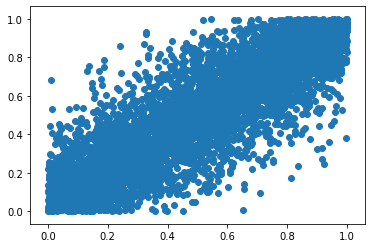

Type of empirical copula is Frank.


In [49]:
# load data
data = pd.read_csv('00_Data/Copula.csv', index_col = 0)

# create and plot empirical copula
x_rank = data.x_sample.rank()/len(data.x_sample)
y_rank = data.y_sample.rank()/len(data.y_sample)
plt.scatter(x_rank, y_rank)
plt.show()
print('Type of empirical copula is Frank.')

# 4 Supervised Learning
This section presents several supervised learning algorithms in the following way:
- Application: When should this algorithm be used?
- Description: What does this algorithm do (high-level)?
- Functionality: How does this algorithm work (drill-down)?
- Limitations: What does one have to keep in mind when using this algorithm?
- Example: How is this algorithm applied?

## 4.1 Linear Regression
- Application: Linear Regression is used to quanify the strength of the linear relationship between a target and explanatory variables and based on this relationship predict the target variable.
- Description: Linear Regression is a linear approach to model the relationship between a scalar target variable and one or more explanatory variables applying i.e. least squares minimization.
- Functionality:
    * We can think of a Linear Regression as an orthogonal projection of the target variable $(\vec{y})$ onto the $span($$\vec{1}$, $\vec{x}$$)$
    * The equation for a Linear Regression is: $y$ = $\beta_{\,0}$ + $\beta_{\,1}$$x_{\,1}$ + ... + $\beta_{\,n}$$x_{\,n}$ + $\epsilon$
    * Our goal is to minimize the following adjusted form of the above equation (least squares minimization): $||$ $\vec{y}$ - ($\vec{\beta}_{\,0}$*$\vec{1}$ + $\vec{\beta}_{\,1}$*$\vec{x}_{\,1}$ + ... + $\vec{\beta}_{\,n}$$\vec{x}_{\,n}$) $||^{\,2}$; representing the minimization of the sum of squared residuals
    * In order to minimize this equation, we optimize $\vec{\beta}$ to find a linear combination of $\vec{1}$ and $\vec{x}$ that is as close to our target variable $\vec{y}$ as possible
    * We achieve this by projecting $\vec{y}$ onto the $span($$\vec{1}$, $\vec{x}$$)$, representing our predicted values
    * The residuals of the model are the differences between the actual values and the predicted values
    * $\vec{\beta}$ are unbiased parameters, meaning that if we were to sample a huge number of data points we would estimate the parameters of the true regression line
    * To determine whether there is a relationship between $y$ and $x$, we test the H0 that the parameters are equal to $0$ (one predictor: reject for p-value < 0.05, multiple predictors: reject for F-statistic > 1)
    * Interaction effect: Changing the value of one predictor effects the values of the other predictors; if this is the case, we have to include an interaction term in the model
    * Polynomial regression: Transform the predictors i.e. with polynomials to better achieve a better accuracy
    * Key assumptions: Linearity between $y$ and $x$, uncorrelated error terms, no pattern in residuals (normal distribution), homoscedasticity (constant variance of residuals), no (multi-)collinearity (independence of predictors, can be detected with Variance Inflation Factor)
- Limitations: It is very sensitive to outliers
- Note: If $y$ is not normally distributed, we need to fit Generalized Linear Models (i.e. $y$ ~ $Binom$, $y$ ~ $Pois$, $y$ ~ $Gamma$), which are estimated with the Maximum Likelihood function and have different links connecting the linear predictor and the expectation of the output (i.e. logit, probit, complementary log-log)

In [138]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [139]:
# load data
boston = load_boston()
features = pd.DataFrame(boston["data"], columns = boston["feature_names"])
y = boston["target"]
y = y[:505]
y_holdout = y[504:]
x = features[["RAD", "ZN", "CRIM", "AGE"]].values
x = x[:505]
x_holdout = x[504:]

# fit regression model
reg = LinearRegression().fit(x, y)

# predict
prediction = reg.predict(x_holdout) 

# print results
print("The betas for the model are: {}".format(np.around(reg.coef_, decimals = 2)))
print("The interception for the model is: {}".format(np.around(reg.intercept_, decimals = 2)))
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(prediction[0], y_holdout[0]))

The betas for the model are: [-0.13  0.08 -0.25 -0.04]
The interception for the model is: 26.49
Prediction: 22.75 vs. Actual: 22.00


## 4.2 Ridge and Lasso Regression
- Application: Ridge and Lasso Regression are applied to fit a linear regression given a large number of predictors with questionable effect on the model's accuracy (feature selection), especially if $p > n$, where $n$ - number of observations, $p$ - number of predictors
- Description: Ridge and Lasso Regression are techniques that regularize the coefficients of the regression, or respectively shrink them to zero in order to reduce varaince of the model
- Functionality:
    * Ridge:
        * Ridge coefficients mimizize: $\sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p}\beta_jx_{ij})^2 + \lambda \sum_{j=1}^{p}\beta_j^2$
        * The tuning parameter $\lambda$ shrinks every dimension of the data by the same proportion
        * The final model will still have all predictors, but the effect of predictors with small coefficients will move towards zero
        * As the tuning parameter $\lambda$ increases, the flexibility of the model fit decreases, leading to reduced variance and higher bias
        * Ridge regression works best if the linear regression has high variance
    * Lasso:
        * Lasso coefficients mimizize: $\sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p}\beta_jx_{ij})^2 + \lambda \sum_{j=1}^{p}|\beta_j|$
        * The tuning parameter $\lambda$ shrinks all coefficients toward zero by the same amount 
        * The adjusted form of the shrinkage penalty has the effect of forcing some of the coefficients to be exactly equal to zero when the tuning parameter $\lambda$ is sufficiently large
        * Hence, Lasso actually performs feautre selection
    * Since the shrinkage penelty does not only impact the $\beta$ but also the value predictor, all predictors should be standardized before fitting a Ridge or Lasso regression
    * The best value for $\lambda$ is found with cross validation
    * Lasso and Ridge are generally less flexible than linear regression
- Limitations: Lasso produces simpler results and more interpretable models that only involve a subset of the predictors than Ridge

#### Ridge

In [103]:
from sklearn.datasets import load_boston
from sklearn import linear_model

In [141]:
boston = load_boston()
features = pd.DataFrame(boston["data"], columns = boston["feature_names"])
y = boston["target"]
y = y[:505]
y_holdout = y[504:]
x = features.values
x = x[:505]
x_holdout = x[504:]

# initialize and fit model
ridge = linear_model.Ridge(alpha=0.2).fit(x, y)

# predict
prediction = ridge.predict(x_holdout) 

# print results
print("The betas for the model are: {}".format(np.around(ridge.coef_, decimals = 2)))
print("The interception for the model is: {}".format(np.around(ridge.intercept_, decimals = 2)))
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(prediction[0], y_holdout[0]))

The betas for the model are: [-1.100e-01  5.000e-02  1.000e-02  2.630e+00 -1.545e+01  3.790e+00
 -0.000e+00 -1.460e+00  3.000e-01 -1.000e-02 -9.000e-01  1.000e-02
 -5.300e-01]
The interception for the model is: 34.81
Prediction: 26.43 vs. Actual: 22.00


#### Lasso

In [107]:
from sklearn.datasets import load_boston
from sklearn import linear_model

In [137]:
boston = load_boston()
features = pd.DataFrame(boston["data"], columns = boston["feature_names"])
y = boston["target"]
y = y[:505]
y_holdout = y[504:]
x = features.values
x = x[:505]
x_holdout = x[504:]

# initialize and fit model
lasso = linear_model.Lasso(alpha=0.2).fit(x, y)

# predict
prediction = lasso.predict(x_holdout) 

# print results
print("The betas for the model are: {}".format(np.around(lasso.coef_, decimals = 2)))
print("The interception for the model is: {}".format(np.around(lasso.intercept_, decimals = 2)))
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(prediction[0], y_holdout[0]))

The betas for the model are: [-0.09  0.05 -0.02  0.   -0.    3.37 -0.   -1.13  0.28 -0.02 -0.75  0.01
 -0.6 ]
The interception for the model is: 27.46
Prediction: 27.39 vs. Actual: 22.00


## 4.3 Logistic Regression
- Application: Logistic Regression is used to model the probabilities for a binary target variable/event/class.
- Description: Logistic Regression is a non-linear classification model that is expressed as a linear model. It models probabilities for a binary target variable based on many more explanatory variables from different domains (categorical and/or continuous variable).
- Functionality:
    * If we'd use a linear regression to model this relationship it would look like this: $p(x) = \beta_0 + \beta_1x_1$; the problem with this equation is that the predicted probabilities don't fall between 0 and 1
    * In order to avoid this problem, we can apply different transformations such as the logistic function: $p(x) = {\frac{exp(\beta_0 + \beta_1x_1)}{1 + exp(\beta_0 + \beta_1x_1)}}$
    * After manipulating this new function we find that: $(\frac{p}{1-p}) = exp(\beta_0 + \beta_1x_1)$
    * $(\frac{p}{1-p})$ is called the odds of the odds of the event $Y=1$ to happen
    * If we want to bound this value between 0 and 1, we can again apply different transformations such as the logistic function: $ln(\frac{p}{1-p}) = \beta_0 + \beta_1x_1$
    * This is called $log$ $odds$ or $logit$ and shows that the logistic regression has a logit that is linear in $x$: We consider a linear model with a target and multiple explanatory variables and assume a linear relationship between the explanatory variables and the $log(odds)$ of the event $Y=1$: 
    * In order to transform the  $log$ $odds$ to the function for the probabilities, we have to apply the Sigmoid Function (inverse of the logit function)
    * Increaseing $x$ by one unit changes the $log$ $odds$ by $\beta_1$, or equivalently it multiplies the $odds$ by $exp(\beta_1)$
    * Logistic Regression fits a linear decision boundary; regression coefficients are estimated using the Maximum Likelihood Method
- Limitations: Logistic Regression can only predict a categorical outcome and cannot solve non-linear problems because it's decision surface is linear

In [130]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [151]:
# load data
iris = load_iris()
iris = pd.concat([pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]), pd.DataFrame(iris['target'], columns = ['Species'])],
                axis = 1)

# make binary classification
iris["Classification"] = np.where(iris["Species"] == 0, 0, 1)

# create arrays
y = iris['Classification']
x = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values

# initialize model
reg = LogisticRegression()

# fit model
reg.fit(x, y)

# predict probabilities
proba = reg.predict_proba([[5.1,3.5,1.4,.2]])

# print results
print("The betas for the model are: {}".format(reg.coef_))
print("The interception for the model is: {}".format(reg.intercept_))
print("The probability for data point with feature values: 5.1, 3.5, 1.4, 0.2 to belong to category 0 is {:.2f}".format(proba[0][0]))

The betas for the model are: [[-0.41021713 -1.46416217  2.26003266  1.02103509]]
The interception for the model is: [-0.26421853]
The probability for data point with feature values: 5.1, 3.5, 1.4, 0.2 to belong to category 0 is 0.98


## 4.4 K-Nearest Neighbors
- Application: K-Nearest Neighbors (KNN) is used for classification or regression
- Description: KNN identifies the k nearest points in the data and estimates the target based on the labels of this set of k nearest points
- Functionality:
    * First, we have to define k, the number of neighbors we are looking for; this number is usually small and depends on the bias-variance-tradeoff (small k high low bias and high variance and vice versa)
    * There are different methods to calculate the distance to the k nearest neighbors (i.e. euclidean, manhattan), selecting the right method is important
    * For classification: The target is classified by a plurality vote of the k nearest neighbors. The class is determined by the most common class among the k nearest neighbors. If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor
    * For regression: The target is estimated simply by the average of the values of the k nearest neighbors
    * It is common to assign weights to the contributions of the neighbors in order for nearer neighbors to contribute more to the target than the more distant ones
- Limitations: KNN is a lazy learner, meaning that it does not learn from the training data but rather uses it for its prediction. This is referred to as memory-based approach, because  we need all training data at each time we want to make a prediction; this makes KNN rather slow, because it has to compute the distance to all points in the training set, sort them, and make a prediction; KNN is not robust to noisy data; KNN does not work well for high dimensionality data because of the curse of dimensionality (there are no points that are close)

#### Regression

In [232]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE

In [247]:
# load data
boston = load_boston()
features = pd.DataFrame(boston["data"], columns = boston["feature_names"])
y = boston["target"]
y = y[:505]
y_holdout = y[504:]
x = features[["RAD", "ZN", "CRIM", "AGE"]].values
x = x[:505]
x_holdout = x[504:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize knn
knn = KNeighborsRegressor(n_neighbors = 10)

# fit knn
knn.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = knn.predict(x_test)

# make predictions on x_train
y_pred_train = knn.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# train rmse
train_rmse = MSE(y_train, y_pred_train)**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'Train set RMSE is {:.2f}'.format(train_rmse))

# predict
prediction = knn.predict(x_holdout)
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(float(prediction), float(y_holdout)))

Test set RMSE is 8.77; Train set RMSE is 7.13
Prediction: 23.18 vs. Actual: 22.00


#### Classification

In [229]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error as MSE

In [248]:
# load data
iris = load_iris()
iris = pd.concat([pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]), pd.DataFrame(iris['target'], columns = ['Species'])],
                axis = 1)
y = iris['Species']
y = y[:149]
y_holdout = y[148:]
x = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
x = x[:149]
x_holdout = x[148:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize knn
knn = KNeighborsClassifier(n_neighbors = 10)

# fit knn
knn.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = knn.predict(x_test)

# make predictions on x_train
y_pred_train = knn.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# train rmse
train_rmse = MSE(y_train, y_pred_train)**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'Train set RMSE is {:.2f}'.format(train_rmse))

# predict
prediction = knn.predict(x_holdout)
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(float(prediction), float(y_holdout)))

Test set RMSE is 0.18; Train set RMSE is 0.18
Prediction: 2.00 vs. Actual: 2.00


## 4.5 Apriori Algorithm
- Application: Apriori is used to find relationships/associations of items in data sets (i.e. market basked analysis).
- Description: Apriori determines item sets that appear sufficiently often together in the data. These item sets are used to define association rules which highlight general trends in the data.
- Functionality:
    * The algorithm is based on the following three constructs: Support, Confidence, and Lift. When running the algorithm, we have to define minimum values for each of the three consturcts
    * Support: Represents the popularity of an item $Support(B) = \frac{trx_B}{trx_{all}}$
    * Confidence: Represents the likelihood that item $B$ is also purchased when item $A$ is purchased: $Confidence(A→B) = \frac{trx_{AB}}{trx_A} $
    * Lift: Represents the increase in the ratio of sale B when A is sold: $Lift(A→B) = \frac{Confidence(A→B)}{Support(B)} $
    * Marketing campagins are focused on the lift specifically. $Lift = 1$ menas there is no association between the products. $Lift > 1$ means that item A & B are more likely to be bought together.
    * This algorithm works solely based on the purchase history of items and we do not need any features to the items to run it.
    * A strong pattern would be an item with low support, meaning it is not purchased very often, but high confidence, meaning that if its purchased it is purchased in combination with other itmes.
- Limitations: Apriori might be slow as it calculates all possible combinations between items, becomeing a problem if there is a large number of items

In [263]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [271]:
# create dataset
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]

# encode transactions
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset).astype('int')
df = pd.DataFrame(te_array, columns = te.columns_)

# apply apriori
frequent_itemsets = apriori(df, min_support = 0.4, use_colnames = True)

# length of sets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print(frequent_itemsets)

# find association rules
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
print(rules)

   support      itemsets  length
0    0.625       (Apple)       1
1    0.750        (Beer)       1
2    0.500        (Rice)       1
3    0.500  (Beer, Rice)       2
  antecedents consequents  antecedent support  consequent support  support  \
0      (Beer)      (Rice)                0.75                0.50      0.5   
1      (Rice)      (Beer)                0.50                0.75      0.5   

   confidence      lift  leverage  conviction  
0    0.666667  1.333333     0.125         1.5  
1    1.000000  1.333333     0.125         inf  


## 4.6 Support Vector Machines
- Application: Support Vector Machienes (SVM) are generally used for classification problems.
- Description: SVMs fit a linear decision boundary that best divides a dataset into two or more classes. SVM can also solve non-linear classification problems, applying the Kernel Trick taht transforms data into higher dimensions in which a linear decision boundary can be fit.
- Functionality:
    * Hyperplane: Linear decision boundary between two classes with $p-1$ dimensions; formula: $\beta_0 + \beta_1x_1 + ... + \beta_px_p = 0$
    * Margin: Minimal distance between the hyperplane and the nearest data point from either class
    * Support Vectors: Data points closest to the hyperplane; removing support vectors alters the position of the hyperplane whereas data points within classes don't
    * **Maximal margin classifier**:
        * Goal: Chose a hyperplane with the highest possible margin within the training set, giving a greater chance of new data being classified correctly
        * To do so we calculate the perpendicular distance form the training data to the hyperplane; this is only possible if the two classes are perfectly seperable
    * **Support vector classifier**: 
        * Goal: Misclassify a few training observations in order to do a better job in classifying the remaining observations
        * To do so we allow a soft margin, meaning that we introduce a budget $C$ for the amount that we can misclassify observations (are around the hyperplane in which data can be misclassified); if $C$ is small, there will be fewer support vectors and hence the classifier will have high variance but low bias
    * **Support vector machines** 
        * Goal: If the decision boundary is non-linear, we transform the data to enlarge the feature space using $kernels$ (an computationally efficient approach to enlarging the feature space)
        * As a result we map our input space into as many higher-dimensionality feature spaces as we need in which we can fit a linear decision boundary with support vector classifiers
        * Kernel SVMs find the function that best transform the input data into a new feature space in order to separate the classes and the output of that function becomes the new dimension (i.e. polynomial, radial)
        * Based on this fitted decision boundary, incoming data is mapped into that same space as the training data and predicted to belong to a category based on the side of the hyperplane on which they fall
- Limitations: Don't perform well on multi-class classification, need to transform into one-vs-many classification; less effective on noisier datasets with overlapping classes and high training times on large datasets

In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report

In [54]:
# load data
iris = load_iris()
iris = pd.concat([pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]), pd.DataFrame(iris['target'], columns = ['Species'])],
                axis = 1)
y = iris['Species']
y = y[:149]
y_holdout = y[148:]
x = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
x = x[:149]
x_holdout = x[148:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize and fit models with different kernels
C = 1
svc = svm.SVC(kernel = 'linear', C = C).fit(x_train, y_train)
rbf = svm.SVC(kernel = 'rbf', gamma = 0.7, C = C).fit(x_train, y_train)
poly_svc = svm.SVC(kernel = 'poly', degree = 3, C = C).fit(x_train, y_train)
lin_svc = svm.LinearSVC(C = C).fit(x_train, y_train)

# predict
y_pred_svc = svc.predict(x_test)
y_pred_rbf = rbf.predict(x_test)
y_pred_poly_svc = poly_svc.predict(x_test)
y_pred_lin_svc = lin_svc.predict(x_test)

# print classification reports
print('y_pred_svc:', classification_report(y_test, y_pred_svc, target_names = ['Setosa', 'Versicolor', 'Virginica']))
print('y_pred_rbf:', classification_report(y_test, y_pred_rbf, target_names = ['Setosa', 'Versicolor', 'Virginica']))
print('y_pred_poly_svc:', classification_report(y_test, y_pred_poly_svc, target_names = ['Setosa', 'Versicolor', 'Virginica']))
print('y_pred_lin_svc:', classification_report(y_test, y_pred_lin_svc, target_names = ['Setosa', 'Versicolor', 'Virginica']))

y_pred_svc:               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      1.00      1.00        11
   Virginica       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

y_pred_rbf:               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      0.91      0.95        11
   Virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

y_pred_poly_svc:               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        12
  Versicolor       1.00      0.91      0.95        11
   Virginica       0.88      1.00 

## 4.7 Classification And Regression Trees
- Application: Classification And Regression Trees (CART) are used for classification and regression problems
- Description: Decision Trees learn decision rules from observations about items. To make conclusions about new items' target variable, we apply the decision rules to the values of new items, meaning that we follow the branches of the Decision Tree, compare values and jump to the next node until arriving at a conclusion
- Functionality:
    * Root node: Doesn't have a parent node, question gets divided into two child nodes
    * Internal node: Has a parent node, question gets divided into two child nodes
    * Lead node: Has a parent node, but no child nodes; represents the prediction
    * Depthness of a decision tree: Number of nodes of the tree
    * Classification: **information gain**
        * Constructing a classification decision tree is about splitting into child nodes in a way that increases the information gain
        * Entropy: Measure of randomness in an event (events with high randomness: hard to draw conclusions from; pure events: expect same outcome for every occurance of the event); formula: $E(S) = \sum_{i=1}^{N} - p_i log_2 p_i$
        * GINI: Measure of total variance across classes in a node; formula: $GINI = 1 - \sum_{i=1}^{N} p_i^2$
        * Information Gain: Decrease in entropy; forumla $IG = Entropy(before$ $split)$ $- Entropy($$after$ $split)$
        * Approach: 
            * Define decision rule based on the items' values that creates the best split of items based on the target variable
            * Calculate information gain for the split; if there is no increase in information gain we formulate another decision rule
            * Once a decision rule with sufficient information gain is defined, we split into two child notes     
            * If we the child nodes have pure events we don't need to split into more nodes; if not we split into more nodes to further increase purity
            * Splitting stops when no further information gain can be made or pre-set stopping rules are met
            * Each branch ends in a lead node, making each observation fall into exaclty one lead node and each lead node uniquely defined by a set of rules
            * The lead nodes' predictions are the mean or mode of all items falling into that leaf node
    * Regression: **recursive binary splitting**
        * Recursive binary splitting: Greedy approach because at each step of the tree-building process, the best split is made at that particular step ignoring a future split that will lead to an overall better tree
        * Approach:
            * Define decision rule based on the itmes' values that leads to the highest possible reduction in residual sum of squares (SSR) of the tree
            * Repeat this process, looking for the best predictor and the best cutpoints to futher minimize the SSR within each resulting node
            * Splitting stops when no further reduction in SSR is possible or pre-set stopping rules are met
            * Cost complexity pruning: Obtain a sequence of subtrees indexed at $\alpha$ (increases with the number of lead nodes), run cross validation on all subtrees and select subtree sith lowest $CV error$; this approach controls the trade-off between the complexity and its fit to the training data
- Limitations: Instability due to high variance in sampled data, high sensitivity to the data that its trained to

#### Regression

In [28]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [109]:
# load data
boston = load_boston()
features = pd.DataFrame(boston["data"], columns = boston["feature_names"])
y = boston["target"]
y = y[:505]
y_holdout = y[504:]
x = features[["RAD", "ZN", "CRIM", "AGE"]].values
x = x[:505]
x_holdout = x[504:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize decision tree
dt = DecisionTreeRegressor(max_depth = 2, min_samples_leaf = 5, random_state = 3)

# fit decision tree
dt.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = dt.predict(x_test)

# make predictions on x_train
y_pred_train = dt.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# mean cv (runs on train set)
mse_cv_scores = - cross_val_score(dt, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

# compute the 10-folds CV rmse
cv_rmse = (mse_cv_scores.mean())**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'the CV RMSE is {:.2f}'.format(cv_rmse))

# find feature importance
print(pd.Series(dt.feature_importances_, index = ["RAD", "ZN", "CRIM", "AGE"]).sort_values(ascending = False))

# predict
prediction = dt.predict(x_holdout)
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(float(prediction), float(y_holdout)))

Test set RMSE is 8.29; the CV RMSE is 7.90
CRIM    0.682594
ZN      0.317406
AGE     0.000000
RAD     0.000000
dtype: float64
Prediction: 22.36 vs. Actual: 22.00


#### Classification

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [66]:
# load data
iris = load_iris()
iris = pd.concat([pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]), pd.DataFrame(iris['target'], columns = ['Species'])],
                axis = 1)
y = iris['Species']
y = y[:149]
y_holdout = y[148:]
x = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
x = x[:149]
x_holdout = x[148:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize decision tree
dt = DecisionTreeClassifier(random_state = 3)

# fit decision tree
dt.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = dt.predict(x_test)

# make predictions on x_train
y_pred_train = dt.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# mean cv (runs on train set)
mse_cv_scores = - cross_val_score(dt, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

# compute the 10-folds CV rmse
cv_rmse = (mse_cv_scores.mean())**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'the CV RMSE is {:.2f}'.format(cv_rmse))

# find feature importance
print(pd.Series(dt.feature_importances_, index = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]).sort_values(ascending = False))

# predict
prediction = dt.predict(x_holdout)
print("Prediction: {} vs. Actual: {}".format(float(prediction), float(y_holdout)))

Test set RMSE is 0.18; the CV RMSE is 0.22
PetalWidthCm     0.884093
PetalLengthCm    0.089412
SepalWidthCm     0.018925
SepalLengthCm    0.007570
dtype: float64
Prediction: 2.0 vs. Actual: 2.0


## 4.8 Random Forest
- Application: Random Forests are used for classifiaction and regression problems.
- Description: Random Forests are an ensemble learning method, training a multitude of decision trees on the same dataset and aggregating the predictions of the individual trees (i.e. mode of classes for classification, mean of predictions for regression)
- Functionality:
    * Esemble Learning: Fit a multitude of independent models on sampeled data from the same dataset and aggregate predictions by majority voting for classification and by averaging for regression
    * Base model: Large number of individual and uncorrelated decision trees; all models must be of the same kind
    * Bagging/Bootsrapping:
        * We take a random sample of observations from the dataset with replacement: If we have a training set with N observations, we still feed each tree a training set of size N, but instead of the original training data, we randomly select N observations with replacement from the training data in order to to produce a bootstrap data set
        * Rationale: This process allows us to emulate the process of obtaining new sample sets, so we can estimate the variablility without generating new samples in order to minimize the variance of the predictions
    * Feature bagging: 
        * When splitting into a node, each decision tree in a random forest can only pick from a random subset of features without replacement, forcing more variation amongst the trees in the model and ultimately resulting in lower correlation across trees and more diversification
        * Rationale: If one or a few features are very strong predictors for the target variable, these features will be selected in many decision trees; we decorrelate the trees
    * We repeat this process multiple times based on the same training data to build different models that are then aggregated repsectively; each individual model has high variance, but averaging the models reduced variance
- Limitations: Some features might get sampled often whereas others not so often; difficult to interpret 

#### Regression

In [111]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [128]:
# load data
boston = load_boston()
features = pd.DataFrame(boston["data"], columns = boston["feature_names"])
y = boston["target"]
y = y[:505]
y_holdout = y[504:]
x = features[["RAD", "ZN", "CRIM", "AGE"]].values
x = x[:505]
x_holdout = x[504:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize decision tree
rf = RandomForestRegressor(max_depth = 10, min_samples_leaf = 5, random_state = 3)

# fit decision tree
rf.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = rf.predict(x_test)

# make predictions on x_train
y_pred_train = rf.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# mean cv (runs on train set)
mse_cv_scores = - cross_val_score(dt, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

# compute the 10-folds CV rmse
cv_rmse = (mse_cv_scores.mean())**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'the CV RMSE is {:.2f}'.format(cv_rmse))

# find feature importance
print(pd.Series(rf.feature_importances_, index = ["RAD", "ZN", "CRIM", "AGE"]).sort_values(ascending = False))

# predict
prediction = rf.predict(x_holdout)
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(float(prediction), float(y_holdout)))

Test set RMSE is 7.86; the CV RMSE is 7.90
CRIM    0.479596
ZN      0.220512
AGE     0.216424
RAD     0.083469
dtype: float64
Prediction: 21.17 vs. Actual: 22.00


#### Classification

In [126]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [127]:
# load data
iris = load_iris()
iris = pd.concat([pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]), pd.DataFrame(iris['target'], columns = ['Species'])],
                axis = 1)
y = iris['Species']
y = y[:149]
y_holdout = y[148:]
x = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
x = x[:149]
x_holdout = x[148:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize decision tree
rf = RandomForestClassifier(max_depth = 1, min_samples_leaf = 10, random_state = 3)

# fit decision tree
rf.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = rf.predict(x_test)

# make predictions on x_train
y_pred_train = rf.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# mean cv (runs on train set)
mse_cv_scores = - cross_val_score(dt, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

# compute the 10-folds CV rmse
cv_rmse = (mse_cv_scores.mean())**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'the CV RMSE is {:.2f}'.format(cv_rmse))

# find feature importance
print(pd.Series(rf.feature_importances_, index = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]).sort_values(ascending = False))

# predict
prediction = rf.predict(x_holdout)
print("Prediction: {} vs. Actual: {}".format(float(prediction), float(y_holdout)))

Test set RMSE is 0.26; the CV RMSE is 0.25
PetalWidthCm     0.5
SepalLengthCm    0.3
PetalLengthCm    0.2
SepalWidthCm     0.0
dtype: float64
Prediction: 2.0 vs. Actual: 2.0


## 4.9 Gradient Boosting
- Application: Gradient Boosting is used for classification and regression problems
- Description: Gradient Boosting is an ensemble learning method, building a multitude of decision trees sequentially with each model learning from the errors of its predecessors
- Functionality:
    * Boosting does not involve bootstrapping; instead each tree is fit on a modified version of the original data
    * We start by fitting a simple model (i.e. decision tree)
    * We then fit a new decision tree to the residuals of the model (we fit the tree using the residuals as the response)
    * We then add this decision tree into the fitted function in order to update the residuals
    * This way, we slowly improve the overall model in areas that it doesn't perform well yet
- Limitations: Prone to overfitting, requires careful tuning of hyperparameters

#### Regression

In [115]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [116]:
# load data
boston = load_boston()
features = pd.DataFrame(boston["data"], columns = boston["feature_names"])
y = boston["target"]
y = y[:505]
y_holdout = y[504:]
x = features[["RAD", "ZN", "CRIM", "AGE"]].values
x = x[:505]
x_holdout = x[504:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize decision tree
gb = GradientBoostingRegressor(max_depth = 3, min_samples_leaf = 10, random_state = 3)

# fit decision tree
gb.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = gb.predict(x_test)

# make predictions on x_train
y_pred_train = gb.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# mean cv (runs on train set)
mse_cv_scores = - cross_val_score(dt, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

# compute the 10-folds CV rmse
cv_rmse = (mse_cv_scores.mean())**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'the CV RMSE is {:.2f}'.format(cv_rmse))

# find feature importance
print(pd.Series(gb.feature_importances_, index = ["RAD", "ZN", "CRIM", "AGE"]).sort_values(ascending = False))

# predict
prediction = gb.predict(x_holdout)
print("Prediction: {:.2f} vs. Actual: {:.2f}".format(float(prediction), float(y_holdout)))

Test set RMSE is 8.14; the CV RMSE is 7.90
CRIM    0.552882
ZN      0.203198
AGE     0.156695
RAD     0.087225
dtype: float64
Prediction: 21.12 vs. Actual: 22.00


#### Classification

In [82]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

In [117]:
# load data
iris = load_iris()
iris = pd.concat([pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]), pd.DataFrame(iris['target'], columns = ['Species'])],
                axis = 1)
y = iris['Species']
y = y[:149]
y_holdout = y[148:]
x = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
x = x[:149]
x_holdout = x[148:]

# split data into train and test 
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.2, random_state = 3)

# initialize decision tree
gb = GradientBoostingClassifier(max_depth = 2, min_samples_leaf = 10, random_state = 3)

# fit decision tree
gb.fit(x_train, y_train)

# make predictions on x_test
y_pred_test = gb.predict(x_test)

# make predictions on x_train
y_pred_train = gb.predict(x_train)

# test rmse
test_rmse = MSE(y_test, y_pred_test)**(1/2)

# mean cv (runs on train set)
mse_cv_scores = - cross_val_score(dt, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

# compute the 10-folds CV rmse
cv_rmse = (mse_cv_scores.mean())**(1/2)

# print results
print('Test set RMSE is {:.2f};'.format(test_rmse), 'the CV RMSE is {:.2f}'.format(cv_rmse))

# find feature importance
print(pd.Series(gb.feature_importances_, index = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]).sort_values(ascending = False))

# predict
prediction = gb.predict(x_holdout)
print("Prediction: {} vs. Actual: {}".format(float(prediction), float(y_holdout)))

Test set RMSE is 0.18; the CV RMSE is 0.25
PetalWidthCm     0.576158
PetalLengthCm    0.415946
SepalWidthCm     0.006801
SepalLengthCm    0.001095
dtype: float64
Prediction: 2.0 vs. Actual: 2.0


## 4.10 Graph Networks
- Application: Graph Networks are used to analyze and visualize several real world datasets such as social networks, web link data, molecular structures, geographical maps, images and text.
- Description: Graph Networks analyze the relationships and dependencies among a set of items.
- Functionality:
    * A graph consists of nodes (items) and edges (relationships)
    * Types: Undirected networks (edges have no direction, directed networks (edges have direction), weighted networks (edges have an assigned weight), multi-graphs (nodes with multiple edges), signed networks (edges with positive or negative sign) 
    * Path finding:
        * Breath First Search algorithm: Finds the minimum number of edges (shortes path) between two nodes
        * Depth First Search algorithm: Visits all of the edges in a network while avoiding circles
    * Centrality:
        * Degree centrality: (# of node neighbors) / (# of potential node neighbors)
        * Betweenness centrality: # of times a node is present in the shortest path of two nodes: (# shortest path through a node) / (all possible shortest paths)
        * Eigenvector centrality: if its connected to other important nodes (i.e. Google page rank)
- Limitations: Entire graph needs to be processed simultaneously, which can be impractical for large graphs

In [35]:
import networkx as nx

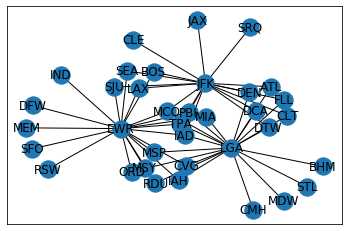

Nodes: ['EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE']
Edges: [('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU

In [46]:
# load data
airlines = pd.read_csv('00_Data/Airlines.csv', index_col = 0)

# initialize graph network
FG = nx.from_pandas_edgelist(airlines, source = 'origin', target = 'dest', edge_attr = True)

# draw the network
nx.draw_networkx(FG)
plt.show()

# print nodes and edges
print('Nodes:', FG.nodes())
print('Edges:', FG.edges())

# calculate average degree centrality
print('Average Degree Centrality:', np.mean(np.asarray(list(nx.algorithms.degree_centrality(FG).values()))))

# 5 Model Assessment

## 5.1 Log Loss Function
- Description: The Log Loss Function is used to measure the performance of a classification model where the prediction is a probability between 0 and 1.
- Functionality:
    * We penalize wrong predictions by adding to the loss function and do not increase the loss function if a correct prediction was made by the classification model.
    * Formula: $logloss = \frac{1}{N} \sum_{i=1}^{N} \sum_{i=1}^{M} y_{ij} ln(p_{ij})$ where $N$ is the number of objects to classify, $M$ is the number of classes, $y_{ij}$ is 1 if the object $i$ belongs the the class $j$ and 0 otherwise, and $p_{ij}$ is the predicted probability that object $i$ belongs to class $j$.

## 5.2 Accuracy, Precision, Recall, F1, R Squared Scores
- Confusion Matrix:

<img src="https://miro.medium.com/max/1594/1*CPnO_bcdbE8FXTejQiV2dg.png"
     width="500" height="300" />
     
- Accuracy:
    * Fraction of predictions our model got right
    * Good measure to report to senior leadership as its an intuitive way of measuring performance
    * $Accuracy = \frac{n~correct~predictions}{n~total~preductions}$
- Recall:
    * How many of the actual positive cases did we find
    * Good measure to determine model accuracy, when the cost of False Negative is high (i.e. fraud detection)
    * $Recall = \frac{True~Positive}{True~Positive + False~Negative} = \frac{True~Positive}{Total~Actual~Positive}$
- Precision:
    * Of all our predicted positive cases, how many of them are actual positive cases
    * Good measure to determine model accuracy, when the costs of False Positive is high (i.e. email spam detection)
    * $Precision = \frac{True~Positive}{True~Positive + False~Positive} = \frac{True~Positive}{Total~Predicted~Positive}$
- F1: 
    * Weighed average of precision and recall
    * Good measure when you want to seek a balance between Precision and Recall
    * $F1 = 2 * \frac{Precision * Recall}{Precision + Recall}$
- R Squared:
    * Provides a measure of how well observed outcomes are replicated by a model
    * Measures the proportion of the variance in the target variable that is predictable from the model's features
    * Adjusted R Squared takes into consideration the number of predictors, accounting for overfitting
    * $ R^2 = 1 - \frac{SSE}{SSE + SSR} = 1 - \frac{SSR}{SST}$
        * SSE (sum of squares of residuals): Measures the unexplained variance of the model, hence the standard deviation of the error $\sum{(y_i - \hat{y})}$
        * SSR (sum of squares of regression): Meaures the explained variance of the model $\sum{(\hat{y_i} - \bar{y})}$
        * SST (total sum of squares): Measures the total variance of the data $\sum{(y_i - \bar{y})}$

## 5.3 Root Mean Square Error
- Description: The Root Mean Square Error (RMSE) is used to measure the performance of regression models.
- Functionality: 
    * Measured the differences between predicted values by a model and the actual values
    * The RMSE will have the the same unit as the dependent variable, meaning that there is no absolute good or bad value    
    * The formulat to find the RMSE is: $RMSE = \sqrt{\sum_{i=1}^{N} \frac{(\hat{y_i} - y_i)^2}{N}}$
    * There are different variations of this formula (i.e. Mean Squared Error)
    * MSE consists of the summ of the variance of of the function, its squared bias and the irreducible error
- Application:
    * Training set: Use training dataset to train model, and apply model to test dataset to predict; then measure error between prediction and actual
    * Test set: Use train dataset to train model and apply the model back to the train data for predictions; then measure error between prediction and actual
    * Cross-Validation: See below

## 5.4 Cross Validation
- Description: Cross Validation is a resampling procedure used 1) to determine how well a model can be expected to perform on new data or 2) to find the minimum point of the training error to select the best hyperparameters or models
- Functionality:
    * We first split all our data into a training and test data set
    * Random: Randomly divide training data into training and validation data
    * K-fold:
        * We then divide our training data into k-folds, with k being some arbitrary number
        * Assume we have 5 folds, so we will train the model on 4 folds and evaluate its performance on the the last fold
        * We repeat this process 4 more times (for the remaining folds), iterating over the 4 training and 1 test folds
        * Once the 5 models were fit, we combine the validation results by i.e. averaging the results of the 5 rounds to give an estimate of the model's predictive performance
        * Consider variance-bias trade-off when selecting k: the higher k the higher the variance and the lower the bias because the fitted models are very similar with higher k because the underlying data is almost the same

## 5.5 Overfitting vs. Underfitting 
- Variance refers to the amount by which the model would change if we introduced it to new training data (how closely does our model model the data points) vs. Bias refers to the error by approximating a real-world problem with a much simpler model
- In general, the more flexible/complicated a model is, the higher its variance and the lower its bias
- Overfitting: 
    * Modeling error occuring when a model is too closely fit to the training set data points and hence captures its noise due to its high complexity
    * The model suffers from high variance, meaning that the model will be inconsistent over different training/testing sets
    * Identification: $training~error > test~error$ OR $CV~error > training~set~error$
    * Counter-measure: Decrease the model complexity, increase the minimum samples per leaf
- Underfitting:
    * Modeling error occuring when a model cannot adequately capture the training data and hence does not fit the data well enough
    * The model suffers from high bias, meaning that the model will not be predicting with high accuracy
    * Identification: $CV~error = training~set~error > test~set~error$
    * Counter-measure: Increase the model complexity, decrease the minimum samples per leaf

# 6 Data Description

This section presents the data that is used to showcase the functionality of the methodologies above.

## 6.1 Iris
This dataset can be accessed through the sklearn package (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. The columns in this dataset are: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species.

## 6.2 Make Moons
This dataset can be accessed through the sklearn package (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html). It produces two interleaving half circles.

## 6.3 Boston
This dataset can be accessed through the sklearn package (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html). It includes data on housing prices in Boston.

## 6.4 Xclara
This dataset can be downloaded from Kaggle (https://www.kaggle.com/hdriss/xclara). It includes two coordinates for datapoits that can relatively easily be clusterd into three clusters.

## 6.5 Movements
This dataset includes daily stock movements on 60 S&P500 companies from 2010-01-04 until 2013-10-29.

## 6.6 Movies
This dataset includes information such as release date, plot, and actors on 250 movies and can be accessed through this website: https://query.data.world/s/uikepcpffyo2nhig52xxeevdialfl7.

## 6.7 Music
This dataset includes information on 100 songs and some of their audio features. The dataset was crawled from Spotify's Developers API.

## 6.8 Credit
This dataset includes 10,000 credit card transactions. A small number of the transactions are fraudulent. The dataset comes with 25 features of the transactions.

## 6.9 Arilines
This dataset includes 100 flights including 18 features about the flight, such as origin, destination, and distance.

# 7 Miscellaneous

## 7.1 Grid Search
- Application: Grid Search is used to find the optimal hyperparameters of a model which results in the most accurate predictions
- Description:
    * Parameters: Internal characteristic of a model, meaning it can be estimated from the data (i.e. beta coefficients for linear regression)
    * Hyperparameters: Characteristic of a model that is external, meaning it cannot be estimated from the data. The hyperparameter needs to be determined when fitting the model (i.e. k for KNN)

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [124]:
# load data
iris = load_iris()
iris = pd.concat([pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]), pd.DataFrame(iris['target'], columns = ['Species'])],
                axis = 1)
y = iris['Species']
x = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values

# initialize models
models = {'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'gb': GradientBoostingClassifier()}

# set parameters for each model
params = {'dt' : {'criterion':('gini', 'entropy'), 'max_depth':[5,7,9,11,13,15,None], 'max_leaf_nodes':list(range(10,100,5))},
          'rf': {'criterion':('gini', 'entropy'), 'max_depth':[5,7,9,11,13,15,None], 'max_leaf_nodes':list(range(10,100,5))},
          'gb': {'max_depth':[5,7,9,11,13,15,None], 'max_leaf_nodes':list(range(10,100,5))}}
          
# run grid search for each model
def fit(x_train, y_train):
    """
    fits the list of models to the training data, thereby obtaining in each case an evaluation score after GridSearchCV cross-validation
    """
    for name in models.keys():
        est = models[name]
        est_params = params[name]
        gscv = GridSearchCV(estimator = est, param_grid = est_params, cv = 5)
        gscv.fit(x_train, y_train)
        print("best parameters are: {}".format(gscv.best_estimator_))

# apply function
fit(x, y)

best parameters are: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
best parameters are: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=40,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
best parameters are: GradientBoostingClassifier(criterion='friedman_mse',

## 7.2 Newton-Raphson
- Application: Newton-Rapshon is applied to approximate roots of a function (i.e. Log-Likelihood function)
- Description: Newton-Raphson method approximates $f(x)$ with Taylor expansion in the vicinity of the previous iteration
- Functionality:
    * We choose an intitial value $x_0$ for the algorithm
    * We write and adjust the Taylor expansion to be: $x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$
    * We check the stopping condition $|x_{i+1} - x_i| \leq \epsilon$, where $\epsilon$ is a preselected small number
    
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/newtonRaphsonMethod.png"
     width="500" height="300" />   
- Limitations: This method requires the derivative of the original function, which can be very complicated. Also the initial guess needs to be fairly accurate

The two roots are -0.81 and 2.47.


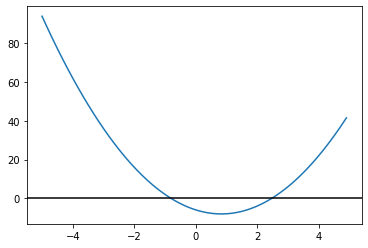

In [101]:
# define newton raphson optimizer
def newton_raphson(start_value, input_function, epsilon):
    x0 = start_value
    x1 = x0 - (input_function(x0) / ((input_function(x0 + 0.0000001) - input_function(x0)) / (0.0000001)))
    while (abs(x1 - x0) > epsilon):
        x0 = x1
        x1 = x0 - (input_function(x0) / ((input_function(x0 + 0.0000001) - input_function(x0)) / (0.0000001)))
    return x1

# create test function
def test_func(x_input):
    return x_input**2 * 3 - x_input*5 - 6

# plot test function
x = np.arange(-5, 5, 0.1)
plot = plt.plot(x, [test_func(i) for i in x])
plot = plt.axhline(y=0, color='k')

# calculate roots
print('The two roots are {:.2f} and {:.2f}.'.format(newton_raphson(-2, test_func, 0.00001), newton_raphson(2, test_func, 0.00001)))

## 7.3 Stats Background

### 7.3.1 General
- **Prediction**: Whats the price of the house given its features vs. **Inference**: How do certain features affect the price
- **Parametric method**: Make assumption about the shape of our function, then find the best parameters for that function (i.e. $\beta_i$ for linear regression) vs. **Non-Parametric method**: no assumption about the shape of our function so large number of observation is needed to obtain accurate estimate of the function (i.e. KNN)
- **Joint probability**: Probability of two events occurring simultaneously vs. **Marginal probability**: Probability of an event irrespective of the outcome of another variable vs. **Conditional probability**: Probability of one event occurring in the presence of a second event
- **Degrees of freedom**: Refer to the number of free parameters in i.e. a model
- **Prospective sampling**: Fix the predictors first then observe the outpu vs. **Retrospective smapling**: Fix the outcome first then observe the predictors

### 7.3.2 Distributions
- Uniform:
    * Description: All events are equally likely on an interval of [a, b]
    * Parameters: $a$ - lower bound, $b$ - upper bound
- Binomial:
    * Description: Sequence of Bernoulli trials counting the number of successes in a sequence of n independent experiments
    * Parameters: $n$ - number of trials, $p$ - success probability for each trial
- Normal:
    * Description: Bell shaped distribution without tails
    * Parameters: $\mu$ - mean, $\sigma^2$ - variance
- Student t-distribution:
    * Description: Bell shaped distribution with fatter tails, meaning that it is more prone to producing values that fall far from its mean; standard deviation unknown
    * Parameters: $v$ - degrees of freedom
- Chi-Squared:
    * Description: Right tail is fat, the higher the degrees of freedom, the colser we get to the normal distribution; used for hypothesis testing
    * Parameters: $k$ - degrees of freedom = mean
- Exponential:
    * Description: Probability distribution of time between events, i.e. a process in which events occur continuously and independently at a constant average rate
    * Parameters: $\lambda$ - scale; mean = $\frac{1}{\lambda}$
- Poisson:
    * Description: Sequence of many Bernoulli trials where success becomes a rare event; if we increase lambda it quickly becomes a normal distribution
    * Parameters: $\lambda$ - expected number of events per unit of time = mean
- Negative Binomial:
    * Description: Sequence of many Bernoulli trials counting the number of failures before achieving a given number of successes 
    * Parameters: $r$ - number of successes until the trial is stopped
- Gamma:
    * Description:$\chi^2$ and exponential distribution are special cases of the gamma distribution
    * Parameters: $\alpha$ - shape; $\theta$ - scale or $\beta$ - scale depending on probability density function

### 7.3.3 Links
- The link is a funciton $g()$ connecting the linear predictor $\eta = \beta_0 + \sum{\beta_iX_i}$ and the expected output $\mu = E[Y]$: $g(\mu)=\eta$
- In the classical linear model $g(\mu)=\mu=\eta$; the linear predictor and expected outcome are identical, hence the link becomes identical function by construction as a result of least-squared method, since $\mu$ and $\eta$ are real numbers
- When the output originates from i.e. counts and the distribution is no longer normal but Poisson; in order to still be able to match the domains of the expected outcome and the linear predictor, we use a link: i.e. $log(\mu) = \eta$
- When the output is binomial the link is usually Logit, Probit, or Complementary log-log
- The different transformations only have an impact on a given range
- Once the transformation is complete, the relationship between the predictors and the response can be modeled with linear regression

### 7.3.4 Maximum Likelihood Estimation
- We apply the method of maximum log-likelihood (MLE) to estimate parameters of generalized models rather than the method of minimizing least squares (MLS)
- For Gaussian distribution the MLE returns the same results as for MLS, this however is not true for other distributions
- We start by assuming a distribution of our output variable (i.e. Gaussian, Poisson) to select the respective likelihood function, which differ for each distribution
- We then need to find parameters (i.e. $\mu$, $\sigma$) that maximize the respective likelihood function, meaning that we can predict the output $Y$ with the highest likelihood:
    * We can apply optimization methods such as $Newton$-$Raphson$ $Method$ that perform a direct search for the maximum of the function
    * We can also solve the equation $L'(\theta, Y) = 0$ with respect to $\theta$ (all parameters that need to be estimated for that likelihood function)
- We can use the likelihood ratio to perform Chi-Squared tests to test if the estimated $\theta$ is likely to be the true parameter of the function: $-2(L(\theta_0; Y) - L(\hat{\theta}; Y)) ~ Chi(1)$, where $\theta_0$ - saturated model, $\hat{\theta}$ - MLE parameters
- Measurement of the goodness of fit:
    * The log-likelihood ratio statistic comparing the saturated model with the estimated model is called deviance: $Deviance = 2\sigma^2(L(\mu^{saturated}; Y) - L(\mu^{MLE}; Y)$
    * In order to determine whether the deviance is too large/small we compare the deviance against: $df +/- \sqrt{2*df}$, where $df$ are degrees of freedom
    * Null Deviance shows how well the response variable is predicted by a model that includes only the intercept

### 7.3.5 Dispersion
- Overdispersion: Presence of higher variability than would be expected based on a given model (variance > mean for Poisson) and vice versa for underdispersion
- If in a Poisson process, there is over-dispersion, we can fit a negative binomial distribution instead as it then metamorphs into Poisson distribution 
- Reasons for overdispersion:
    * Outliers in the data
    * Violation of independent Bernoulli trials or Poisson events
    * Time-dependent probability of success in case of binomial distribution or time-dependent intensity of a Poisson process
    * Increased number of zeros in the sample
- Methods for dealing with overdispersion due to an increase number of zeros:
    * **Hurdle model**: Combination of 1) model producing only zeros and 2) model producing only positive counts (zero-truncated model); hurdle models can be based on Poisson or Negative Binomial models
    * **Zero-inflated model**: Combination of 1) zero-producing model (logistic) and 2) regular Poisson or Negative Binomial model; $P(y_i = 0) = p_i + (1-p_i)e^{-\lambda_i}$ and $P(y_i=k) = (1-p_i)\frac{e^{-\lambda_i}\lambda_i^k}{k!}$

### 7.3.6 Contingency Tables
- Contingency tables are used for $\chi^2$-test of independency of factors (i.e. is one variable affected be the other)
- Contingency tables contain information about joint and marginal distributions
- $Y$ needs to be the number of observations observed with the corresponding combinations of factors
- We can then calculate the mean count of every cell to build the $\chi^2$-statistic: $\chi^2 = \sum{\frac{(y_{ij}-\mu_{ij})^2}{\mu_{ij}}}$
- If this is distributed as $\chi^2((I-1)(J-1))$, where $I$ and $J$ - number of levels of each factor, the factors are indeed independent 
- Generilzed linear model (glm) approach:
    * If we want to fit a glm, we need to use traditional data tables
    * We can also test for independency of features with the glm approach by fitting a saturated model (with interaction terms) and a model without interaction terms; if the two are the same, there is no interaction and the features are hence independent
    * Which glm we fit depends on the underlying distribution of the data (i.e. Poisson, Negative Binomial, Multinomial)

### 7.3.7 Fixed & Random Effects (lecture 8, 9)

## 7.4 Other Notes
- **Training MSE** is usually underestimating the test MSE, because we fit the model to the training data, minimizing the error; models with many parameter will explain more variance in the training data, but might be unstable on the test data, hence we measure their performance including the price paid for additional predictors in order to eliminate noisy predictors (i.e. AIC, adjusted $R^2$, BIC)
- **Bayes decision boundary**: Classifies an observation to the class for which $p(x)$ is largest; for 2 points the boundary is where the probability is equal to 50%; in general Bayes classifier produces the lowest possible error rate
- Regularization:
    * **Subset Selection**:
        * Fit $p^2$ separate least squared linear regression models for each possible combination of the $p$ predictors and then select the best model
        * Selection is based on i.e. CV error, test set error or adjusted $R^2$ to account for the increase in predictors
        * This approach is computationally intensive esp. for large $p$ and alternative approaches are: Forward (claculate null model, then calculate all models that contain one additional predictor, choose models with smallest RSS, select best model using cross validation/AIC/BIC) and Backward (claculate full model, then calculate all models that contain all but one predictor, choose models with smallest RSS, select best model using cross validation/AIC/BIC) Selection
    * **Shrinkage**:
        * See chapters on lasso and ridge regression models
    * **Dimension Reduction**:
        * Above approach is focused on selecting the right predictors, this approach is focused on transforming the predictors; for more details see section on dimension reduction
- Problem of **high-dimensionality data** ($p >> n$): We can perfectly fit our data without any error
- Methods to make linear models non-linear:
    * **Polynomial regression**: Rasining each of the predictor to a power; i.e. cubic regression uses three variables $X, X^2, X^3$
    * **Step functions**: Cut range of a predictor into $K$ distinct regions, producing a qualitative variable to then fit a piecewise constant function
    * **Regression splines**: Divide range of predictor into $K$ distinct regions, fit polynomial function within each region, functions are constrained so that they join smoothly at the region boundaries/knots
    * **Smoothing splines**: Result from minimizing least squares subject only to a smoothness penalty (second derivative of function/roughness)
    * **Local regression**: Divide data into regions based on their neighbors in which unique regressions are built and merged in a smooth way
    * **Generalized additive models**: Add different models of multiple predictors; be aware of missing interaction if not specified separately